#### Title: analysis of AI research papers popularity on ArXiv twitter account ArXiv_Daily

Questions:
- Question 1: What are the most common paper categories on arXive?
- Question 2. What are the most favorite arXive papers categories?
- Question 2b. Estimate category value (contribution) in respect to like.
- Question 3. What are the most shared arXive papers categories?
- Question 3b. Estimate category value (contribution) in respect to shares.
- Question 4. Estimate single hashtag value (contribution) in respect to likes (2 methods).
- Question 5. Estimate single hashtag value (contribution) in respect to favourites (2 methods).
- Side question: explore no-hashtag enormous values (at the end of script :).

Assumption: arXive tweet hashtag is representative for it's paper content category (checked.)

In [12]:
from twython import Twython
import pandas as pd
import json

# Getting tweets from user timeline
# ---------------------------------

def connect_to_twitter(twitter_auth_path):
    with open(twitter_auth_path, 'r') as f:
        twitter_auth = json.load(f)
        APP_KEY = twitter_auth['APP_KEY'] # your app key
        APP_SECRET = twitter_auth['APP_SECRET'] # your app secret
        OAUTH_TOKEN = twitter_auth['OAUTH_TOKEN'] # your oauth token
        OAUTH_TOKEN_SECRET = twitter_auth['OAUTH_TOKEN_SECRET'] # your oauth token secret
    twitter = Twython(APP_KEY, APP_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
    return twitter

# Picking intresting data from Twitter API response file
# ------------------------------------------------------

def get_tweet_data(tweet, tweet_data):        
    tweet_data['text'] = tweet['text']
    tweet_data['hashtags'] = get_hashtags_string(tweet)
    tweet_data['link'] = get_expanded_url_of_link_in_tweet(tweet)
    tweet_data['tweet_id'] = tweet['id']
    tweet_data['created_at'] = tweet['created_at']
    tweet_data['retweet_count'] = tweet['retweet_count']
    tweet_data['favorite_count'] = tweet['favorite_count']
    tweet_data['in_reply_to_status_id'] = tweet['in_reply_to_status_id']
    tweet_data['in_reply_to_screen_name'] = tweet['in_reply_to_screen_name']    
    return tweet_data

def get_tweet_author_data(tweet, tweet_data):
    tweet_data['author'] = tweet['user']['screen_name']
    tweet_data['account_created_at'] = tweet['user']['created_at']
    tweet_data['author_description'] = tweet['user']['description']
    tweet_data['author_id'] = tweet['user']['id']
    tweet_data['author_location'] = tweet['user']['location']
    tweet_data['author_statuses_count'] = tweet['user']['statuses_count']
    tweet_data['author_followers_count'] = tweet['user']['followers_count']
    tweet_data['author_friends_count'] = tweet['user']['friends_count']
    tweet_data['author_favourites_count'] = tweet['user']['favourites_count']
    tweet_data['author_listed_count'] = tweet['user']['listed_count']
    tweet_data['author_url'] = get_expanded_url_of_link_in_author_account(tweet)   
    return tweet_data

# Helpers for extracting Twitter API response file
# ------------------------------------------------

def get_hashtags_string(tweet):
    hashtags_string = ''
    for nr in range(len(tweet['entities']['hashtags'])):
        hashtags_string += tweet['entities']['hashtags'][nr]['text'] + ' '
    if not hashtags_string:
        hashtags_string = 'NO_HASHTAGS'
    return hashtags_string

def get_expanded_url_of_link_in_tweet(tweet):
    url = tweet['entities']['urls']
    if url:
        return url[0]['expanded_url']
    else:
        return None
    
def get_expanded_url_of_link_in_author_account(tweet):
    url = tweet['user']['entities']['url']['urls']
    if url:
        return url[0]['expanded_url']
    else:
        return None

# Save tweets dataset
# -------------------

def save_tweets_as_CSV(save_path, all_tweets_list, tweet_nr):
    tweet_df = pd.DataFrame(all_tweets_list)
    tweet_df.to_csv(save_path+'.csv', sep='\t', encoding='utf-8', index=False)
    print('{} tweets saved to {}'.format(tweet_nr, save_path+'.csv'))

def save_tweets_as_JSON(save_path, all_tweets, tweet_nr):
    with open(save_path+'.json', 'w') as f:
        json.dump(all_tweets, f)
        print('{} tweets saved to {}'.format(tweet_nr, save_path+'.json'))

# Main
# ----

def get_twitter_user_timeline(twitter, search_phrase):
    search_pages = twitter.cursor(twitter.get_user_timeline, screen_name=search_phrase, return_pages=True, count=200)
    return search_pages

def get_all_tweets_from_user_timelne(search_pages, save_path):
    try:
        all_tweets, all_tweets_list = {}, []
        tweet_nr, page_nr = 0, 0
        for page in search_pages:
            page_nr +=1
            for tweet in page:
                tweet_nr +=1
                tweet_data = {}
                tweet_data = get_tweet_data(tweet, tweet_data)
                tweet_data = get_tweet_author_data(tweet, tweet_data)
                all_tweets[str(tweet_nr)] = tweet_data
                all_tweets_list.append(tweet_data)
            print('Pages done: {}, tweets done: {}'.format(page_nr, tweet_nr))
    except:
        save_tweets_as_JSON(save_path, all_tweets, tweet_nr)
        save_tweets_as_CSV(save_path, all_tweets_list, tweet_nr)

def get_user_tweets(search_phrase, save_path, twitter_auth_path):
    twitter = connect_to_twitter(twitter_auth_path)
    search_pages = get_twitter_user_timeline(twitter, search_phrase)
    get_all_tweets_from_user_timelne(search_pages, save_path)

In [13]:
# Get all user tweets from API
# ----------------------------

search_phrase = 'arXiv_Daily'
save_path = search_phrase + '_timeline_tweets'
twitter_auth_path = 'twitter_auth.json'

get_user_tweets(search_phrase, save_path, twitter_auth_path)

Pages done: 1, tweets done: 200
Pages done: 2, tweets done: 400
Pages done: 3, tweets done: 600
Pages done: 4, tweets done: 800
Pages done: 5, tweets done: 1000
Pages done: 6, tweets done: 1200
Pages done: 7, tweets done: 1400
Pages done: 8, tweets done: 1600
Pages done: 9, tweets done: 1800
Pages done: 10, tweets done: 2000
Pages done: 11, tweets done: 2200
Pages done: 12, tweets done: 2400
Pages done: 13, tweets done: 2600
Pages done: 14, tweets done: 2800
Pages done: 15, tweets done: 3000
Pages done: 16, tweets done: 3069
3069 tweets saved to arXiv_Daily_timeline_tweets.json
3069 tweets saved to arXiv_Daily_timeline_tweets.csv


In [14]:
# Load tweets from csv
# --------------------

tweets_df = pd.read_csv(save_path + ".csv", sep='\t', )

print("Tweets dataset shape: {}".format(tweets_df.shape))
print("Tweets dataset:")
tweets_df.head(2)

Tweets dataset shape: (3069, 20)
Tweets dataset:


,account_created_at,author,author_description,author_favourites_count,author_followers_count,author_friends_count,author_id,author_listed_count,author_location,author_statuses_count,author_url,created_at,favorite_count,hashtags,in_reply_to_screen_name,in_reply_to_status_id,link,retweet_count,text,tweet_id
0,Tue Dec 26 03:27:26 +0000 2017,arXiv_Daily,Daily feed of this week's top research article...,145,10717,3130,945496245530869760,108,1.5 AU,3069,https://deepai.org/arxiv,Mon Jan 14 20:08:40 +0000 2019,0,Learning MachineLearning Sound ComputerScience,NaN,NaN,https://deepai.org/publication/presence-absenc...,0,#Learning #MachineLearning #Sound #ComputerSci...,1084905154338467841
1,Tue Dec 26 03:27:26 +0000 2017,arXiv_Daily,Daily feed of this week's top research article...,145,10717,3130,945496245530869760,108,1.5 AU,3069,https://deepai.org/arxiv,Mon Jan 14 18:08:47 +0000 2019,4,PatternRecognition ComputerVision,NaN,NaN,https://deepai.org/publication/what-should-i-d...,1,#PatternRecognition #ComputerVision https://t....,1084874985494044673


In [15]:
# Tweet & it's hashtags examples:
pd.options.display.max_colwidth = 300
tweets_df.loc[8:18,['text','hashtags']]

,text,hashtags
8,This one is a must read - the latest #ComputerVision #ComputerScience #PatternRecognition #Computation research by… https://t.co/fezD8nz854,ComputerVision ComputerScience PatternRecognition Computation
9,#ComputerVision #PatternRecognition https://t.co/oiW3r4pQo0,ComputerVision PatternRecognition
10,#PatternRecognition #ComputerVision https://t.co/I1q4BCuo5W,PatternRecognition ComputerVision
11,Don't miss the latest research article published by @drfeifei @imadamtm this week on #arxiv #ComputerScience… https://t.co/b5N5ARhg4b,arxiv ComputerScience
12,Data Science research moves quickly. Stay up-to-date with the latest publication by @ccloy #PatternRecognition… https://t.co/EaOLz5bUFI,PatternRecognition
13,#PatternRecognition #ComputerVision https://t.co/o5t70VUoUy,PatternRecognition ComputerVision
14,Interested in #MachineLearning #Sound #ComputerScience #Computation ? check out the latest publication by @Bjorn3353 https://t.co/znuAamiwAO,MachineLearning Sound ComputerScience Computation
15,Stay current on the latest #ComputerScience #ComputerVision #ArtificialIntelligence #Learning research published by… https://t.co/kX5DV116Ni,ComputerScience ComputerVision ArtificialIntelligence Learning
16,This week's #MachineLearning #Learning #ArtificialIntelligence #ComputerScience research by @ylecun https://t.co/VABbXjUwCC,MachineLearning Learning ArtificialIntelligence ComputerScience
17,This one is a must read - the latest #ComputerScience #Learning #MachineLearning research by @shanelegg https://t.co/jHbB3ksiPt,ComputerScience Learning MachineLearning


In [16]:
# Dataset preperation
# -------------------

# Pick relevant tweet data
tweet_data = tweets_df.loc[:,['created_at', 'text', 'hashtags', 'link', 'retweet_count', 'favorite_count' ]]

# Check if there are no-hashtag posts
# -> Solved in data download step with placeholder for ~5% tweets.
# tweets_df[(tweets_df.hashtags.isnull() == True)].shape 

# Add hashtags as dummies
hashtag_dummies = pd.get_dummies(tweets_df.hashtags.str.split().apply(pd.Series).stack()).sum(level=0)

# Some hashtags got double tagged, we count it as 1
hashtag_dummies[hashtag_dummies > 1] = 1 

# Store hashtag names for further steps
hashtags = hashtag_dummies.columns.tolist()

# Add hashtags count for given tweet
tweet_data['nr_of_hashtags'] = hashtag_dummies[hashtags].sum(axis=1)

In [17]:
print('Hashtags ({}): {}'.format(len(hashtags), hashtags))

Hashtags (66): ['AI', 'Algorithms', 'ArtificialIntelligence', 'CSProgrammingLanguages', 'ClusterComputing', 'Computation', 'ComputationalComplexity', 'ComputationalEngineering', 'ComputationalGeometry', 'ComputerGraphics', 'ComputerScience', 'ComputerScienceArchitecture', 'ComputerScienceDatabases', 'ComputerScienceLiterature', 'ComputerScienceMultimedia', 'ComputerSciencePerformance', 'ComputerVision', 'Computers', 'Cryptography', 'DataScience', 'DataStructures', 'DeepLearning', 'DeepRL', 'DiscreteMathematics', 'Distributed', 'EvolutionaryComputing', 'Finance', 'GameTheory', 'Human', 'InformationRetrieval', 'InformationTheory', 'InternetArchitecture', 'Language', 'Learning', 'LogicinComputerScience', 'ML', 'MachineLearning', 'MathematicalSoftware', 'MultiagentSystems', 'NO_HASHTAGS', 'Networking', 'NeuralNetwork', 'NeuralNetworks', 'NumericalAnalysis', 'OpticalNetworks', 'Parallel', 'PatternRecognition', 'Research', 'Robotics', 'SaturdayMorning', 'Science', 'Security', 'Society', 'Sof

In [18]:
print('tweet_data df shape: {}, head:'.format(tweet_data.shape))
display(tweet_data.head(2))

tweet_data df shape: (3069, 7), head:


,created_at,text,hashtags,link,retweet_count,favorite_count,nr_of_hashtags
0,Mon Jan 14 20:08:40 +0000 2019,#Learning #MachineLearning #Sound #ComputerScience https://t.co/Ezm9pT1nlk,Learning MachineLearning Sound ComputerScience,https://deepai.org/publication/presence-absence-estimation-in-audio-recordings-of-tropical-frog-communities,0,0,4
1,Mon Jan 14 18:08:47 +0000 2019,#PatternRecognition #ComputerVision https://t.co/yWDQwwvFbn,PatternRecognition ComputerVision,https://deepai.org/publication/what-should-i-do-now-marrying-reinforcement-learning-and-symbolic-planning,1,4,2


In [19]:
print('hashtag_dummies df shape: {}, head:'.format(hashtag_dummies.shape))
display(hashtag_dummies.head(2))

hashtag_dummies df shape: (3069, 66), head:


,AI,Algorithms,ArtificialIntelligence,CSProgrammingLanguages,ClusterComputing,Computation,ComputationalComplexity,ComputationalEngineering,ComputationalGeometry,ComputerGraphics,...,StatisticsComputation,StatisticsMethodology,StatisticsTheory,SymbolicComputation,arxiv,computervision,machinelearning,physics,research,tbt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Final dataset
# -------------
arXiv_tweets = pd.concat([tweet_data, hashtag_dummies], axis=1 )

print('Combined dfs as arXiv_tweets shape: {}, head:'.format(arXiv_tweets.shape))
display(arXiv_tweets.head(5))

Combined dfs as arXiv_tweets shape: (3069, 73), head:


,created_at,text,hashtags,link,retweet_count,favorite_count,nr_of_hashtags,AI,Algorithms,ArtificialIntelligence,...,StatisticsComputation,StatisticsMethodology,StatisticsTheory,SymbolicComputation,arxiv,computervision,machinelearning,physics,research,tbt
0,Mon Jan 14 20:08:40 +0000 2019,#Learning #MachineLearning #Sound #ComputerScience https://t.co/Ezm9pT1nlk,Learning MachineLearning Sound ComputerScience,https://deepai.org/publication/presence-absence-estimation-in-audio-recordings-of-tropical-frog-communities,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mon Jan 14 18:08:47 +0000 2019,#PatternRecognition #ComputerVision https://t.co/yWDQwwvFbn,PatternRecognition ComputerVision,https://deepai.org/publication/what-should-i-do-now-marrying-reinforcement-learning-and-symbolic-planning,1,4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mon Jan 14 16:08:42 +0000 2019,This one is a must read - the latest #ComputerScience #Learning #MachineLearning research by @arkrause https://t.co/x6yJlQMYP0,ComputerScience Learning MachineLearning,https://deepai.org/publication/no-regret-bayesian-optimization-with-unknown-hyperparameters,4,9,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mon Jan 14 14:08:40 +0000 2019,#ComputerScience #MachineLearning #Learning https://t.co/UvgCxvlaJK,ComputerScience MachineLearning Learning,https://deepai.org/publication/gm-pll-graph-matching-based-partial-label-learning,2,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mon Jan 14 12:08:47 +0000 2019,#ComputerVision #PatternRecognition https://t.co/F3PrnpU852,ComputerVision PatternRecognition,https://deepai.org/publication/retinamask-learning-to-predict-masks-improves-state-of-the-art-single-shot-detection-for-free,3,5,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Question 1: What are the most common paper categories on arXive?

hashtag_appearances = {}
hashtag_appearances_as_percent = {}
for hashtag in hashtags:
    hashtag_appearances[hashtag] = arXiv_tweets[hashtag].sum()
    hashtag_appearances_as_percent[hashtag] = (hashtag_appearances[hashtag] / len(arXiv_tweets)).round(4) * 100

data = [hashtag_appearances, hashtag_appearances_as_percent]
column_names = ['appearances', 'appearances_as_percent']
hashtag_appearances_df = pd.DataFrame(data, index=column_names).T.sort_values(by=['appearances'],ascending=False)
hashtag_appearances_df.head(10)

,appearances,appearances_as_percent
ComputerVision,1731.0,56.40
PatternRecognition,1718.0,55.98
ComputerScience,1026.0,33.43
Learning,951.0,30.99
MachineLearning,822.0,26.78
ArtificialIntelligence,376.0,12.25
arxiv,183.0,5.96
NO_HASHTAGS,159.0,5.18
Language,99.0,3.23
Computation,97.0,3.16


In [22]:
# # Question 2: What are the most favorited arXive papers categories on twitter?

# Recode hashtag dummies into it's favourite_count value
arXiv_fav = arXiv_tweets.copy(deep=True) 
for hashtag in hashtags:
    for i, val in enumerate(arXiv_fav.loc[:,hashtag]):
        if val == 1:
            arXiv_fav.loc[i,hashtag] = arXiv_fav.loc[i,'favorite_count']

# Sum it
hashtag_likes_sum = {}
for hashtag in hashtags:
    hashtag_likes_sum[hashtag] = arXiv_fav[hashtag].sum()

# General result:
data = [hashtag_appearances, hashtag_likes_sum] 
column_names = ['appearances', 'likes_sum']
hashtag_likes_df = pd.DataFrame(data, index=column_names).T.sort_values(by=['likes_sum'],ascending=False)

# Calculate like value
hashtag_likes_df['like_val'] = (hashtag_likes_df.likes_sum / hashtag_likes_df.appearances).round(1)

print("Most liked categories:")
display(hashtag_likes_df.head(15))

Most liked categories:


,appearances,likes_sum,like_val
ComputerVision,1731,5123,3.0
PatternRecognition,1718,5049,2.9
ComputerScience,1026,3644,3.6
Learning,951,3486,3.7
MachineLearning,822,2942,3.6
ArtificialIntelligence,376,1302,3.5
arxiv,183,563,3.1
NeuralNetwork,88,403,4.6
EvolutionaryComputing,84,318,3.8
Robotics,90,234,2.6


In [23]:

# Question 2b. Estimate category value (contribution) in respect to likes.
# By category like value:

print("Most valuable categories by like value:")
display(hashtag_likes_df.sort_values(by=['like_val'],ascending=False).head(50))

Most valuable categories by like value:


,appearances,likes_sum,like_val
DataScience,2,57,28.5
ComputerScienceLiterature,1,19,19.0
AI,7,58,8.3
NumericalAnalysis,4,23,5.8
NeuralNetwork,88,403,4.6
ComputerScienceDatabases,5,23,4.6
SymbolicComputation,1,4,4.0
ComputerSciencePerformance,4,16,4.0
EvolutionaryComputing,84,318,3.8
Learning,951,3486,3.7


In [24]:
# Question 3: What are the most shared arXive papers categories (by it's active twitter readers)?

# Recode hashtag dummies into it's retweet_count value
arXiv_re = arXiv_tweets.copy(deep=True) 
for hashtag in hashtags:
    for i, val in enumerate(arXiv_re.loc[:,hashtag]):
        if val == 1:
            arXiv_re.loc[i,hashtag] = arXiv_re.loc[i,'retweet_count']
            
# Sum it
hashtag_retweet_sum = {}
for hashtag in hashtags:
    hashtag_retweet_sum[hashtag] = arXiv_re[hashtag].sum()

# General result:
data = [hashtag_appearances, hashtag_retweet_sum] 
column_names = ['appearances', 'retweet_sum']
hashtag_retweet_df = pd.DataFrame(data, index=column_names).T.sort_values(by=['retweet_sum'],ascending=False)

# Calculate share value
hashtag_retweet_df['retweet_val'] = (hashtag_retweet_df.retweet_sum / hashtag_retweet_df.appearances).round(1)

print("Most shared categories:")
display(hashtag_retweet_df.head(15))

Most shared categories:


,appearances,retweet_sum,retweet_val
ComputerVision,1731,1403,0.8
PatternRecognition,1718,1353,0.8
NO_HASHTAGS,159,1352,8.5
ComputerScience,1026,1323,1.3
Learning,951,1260,1.3
MachineLearning,822,1123,1.4
ArtificialIntelligence,376,559,1.5
arxiv,183,191,1.0
NeuralNetwork,88,135,1.5
Robotics,90,120,1.3


In [25]:
# Question 3b. Estimate category value (contribution) in respect to share
# By category share value:

print("Most valuable categories by share value:")
display(hashtag_retweet_df.sort_values(by=['retweet_val'],ascending=False).head(50))

Most valuable categories by share value:


,appearances,retweet_sum,retweet_val
DataScience,2,38,19.0
ComputerScienceLiterature,1,15,15.0
NeuralNetworks,2,23,11.5
NO_HASHTAGS,159,1352,8.5
DeepLearning,4,33,8.2
DeepRL,1,6,6.0
AI,7,39,5.6
physics,1,3,3.0
NumericalAnalysis,4,7,1.8
ArtificialIntelligence,376,559,1.5


In [26]:
# To sum it up
hashtags_df = pd.DataFrame()
hashtags_df['appear_sum'] = hashtag_appearances_df.appearances
hashtags_df['appear_perc'] = hashtag_appearances_df.appearances_as_percent
hashtags_df['likes_sum'] = hashtag_likes_df.likes_sum
hashtags_df['likes_perc'] = (hashtag_likes_df.likes_sum / arXiv_tweets.favorite_count.sum()).round(4) * 100
hashtags_df['like_val'] = hashtag_likes_df.like_val
hashtags_df['retweets_sum'] = hashtag_retweet_df.retweet_sum
hashtags_df['retweets_perc'] = (hashtag_retweet_df.retweet_sum / arXiv_tweets.retweet_count.sum()).round(4) * 100
hashtags_df['retweet_val'] = hashtag_retweet_df.retweet_val
hashtags_df.head(30)

,appear_sum,appear_perc,likes_sum,likes_perc,like_val,retweets_sum,retweets_perc,retweet_val
ComputerVision,1731.0,56.40,5123,55.44,3.0,1403,32.64,0.8
PatternRecognition,1718.0,55.98,5049,54.64,2.9,1353,31.47,0.8
ComputerScience,1026.0,33.43,3644,39.44,3.6,1323,30.77,1.3
Learning,951.0,30.99,3486,37.73,3.7,1260,29.31,1.3
MachineLearning,822.0,26.78,2942,31.84,3.6,1123,26.12,1.4
ArtificialIntelligence,376.0,12.25,1302,14.09,3.5,559,13.00,1.5
arxiv,183.0,5.96,563,6.09,3.1,191,4.44,1.0
NO_HASHTAGS,159.0,5.18,141,1.53,0.9,1352,31.45,8.5
Language,99.0,3.23,229,2.48,2.3,68,1.58,0.7
Computation,97.0,3.16,216,2.34,2.2,71,1.65,0.7


In [27]:
# But it's still not a perfect mesure. How to count value of a single hashtag if they comes in sets of 2,3,4 or even?

In [28]:
# Method 1 (too simplistic but let's give it a try for learning purposes)

# Assumption: we can divide hashtag value equaly to it's contributors and 
#             rely on sum of all it's occurences to ballance the weight.
#             I don't trust it, but i am curions on results in compare with mine approach.

In [29]:
# Question 4a. Estimate single hashtag value (contribution) in respect to likes (method 1)

arXiv_fav_set = arXiv_tweets.copy(deep=True)
for hashtag in hashtags:
    for i, val in enumerate(arXiv_fav_set.loc[:,hashtag]):
        if val == 1:
            hashtag_value = (arXiv_fav_set.favorite_count[i] / arXiv_fav_set.nr_of_hashtags[i]).round(2)
            arXiv_fav_set.loc[i,hashtag] = hashtag_value

like_set_average_sum = {}
for hashtag in hashtags:
    like_set_average_sum[hashtag] = arXiv_fav_set[hashtag].sum()
    
data = [like_set_average_sum, hashtag_appearances]
index = ['like_set_average_sum','appearances']
like_tweet_avrg_df = pd.DataFrame(data, index=index).T
like_tweet_avrg_df['like_val_by_tweet_avrg'] = (like_tweet_avrg_df.like_set_average_sum / like_tweet_avrg_df.appearances).round(2)

# Question 5. Estimate single hashtag value (contribution) in respect to favourites (2 methods)
like_tweet_avrg_df.sort_values(by='like_val_by_tweet_avrg',ascending=False).head(5)

,like_set_average_sum,appearances,like_val_by_tweet_avrg
DataScience,14.25,2.0,7.12
ComputerScienceLiterature,4.75,1.0,4.75
AI,14.58,7.0,2.08
machinelearning,2.00,1.0,2.00
NumericalAnalysis,7.08,4.0,1.77


In [30]:
# Question 5a. Estimate single hashtag value (contribution) in respect to shares (method 1: tweet average)

arXiv_re_set = arXiv_tweets.copy(deep=True)
for hashtag in hashtags:
    for i, val in enumerate(arXiv_re_set.loc[:,hashtag]):
        if val == 1:
            hashtag_value = round(arXiv_re_set.retweet_count[i] / arXiv_re_set.nr_of_hashtags[i]).round(2)
            arXiv_re_set.loc[i,hashtag] = hashtag_value

retweet_set_average_sum = {}
for hashtag in hashtags:
    retweet_set_average_sum[hashtag] = arXiv_re_set[hashtag].sum()
    
data = [retweet_set_average_sum, hashtag_appearances]
index = ['retweet_set_average_sum','appearances']
rt_tweet_avrg_df = pd.DataFrame(data, index=index).T
rt_tweet_avrg_df['retweet_val_by_tweet_avrg'] = (rt_tweet_avrg_df.retweet_set_average_sum / rt_tweet_avrg_df.appearances).round(2)

rt_tweet_avrg_df.sort_values(by='retweet_val_by_tweet_avrg',ascending=False).head(5)

,retweet_set_average_sum,appearances,retweet_val_by_tweet_avrg
NeuralNetworks,22.0,2.0,11.0
NO_HASHTAGS,1352.0,159.0,8.5
DeepLearning,30.0,4.0,7.5
DeepRL,6.0,1.0,6.0
DataScience,10.0,2.0,5.0


In [31]:
# Method 2
# Assumption: we can get hashtag in given tweet value out of:
#             ghav -> given_hashtag_avrg_val (sum  favourites values of all tweets with 
#             occurence of hashtag divided by it's occurences)
#             soachigtv-> divided by sum_of_all_coocuring_hashtags_in_given_tweet_vals
#             ghfv -> multiplied by given_hashtag_favourites_value
#             that is:
#             hashtag_value_in_tweet = ghfv * (ghav / soachigtv)
#             and calculate avrg_hashtag_value_in_tweet by:
#             avrg_hashtag_value_in_tweet = hashtag_value_in_tweet / occurences

In [32]:
# Question 4b. Estimate single hashtag value (contribution) in respect to likes (method 2: tag sensitive all-time average)

likes_all_time_avrg = arXiv_tweets.copy(deep=True)
for i, tweet_hashtags in enumerate(arXiv_tweets.hashtags):

    tweet_weight_sum = 0
    tweet_hashtags_weights = {} 
    for tweet_hashtag in tweet_hashtags.split():
        tweet_hashtags_weights[tweet_hashtag] = hashtags_df.loc[tweet_hashtag,'like_val']
        tweet_weight_sum += tweet_hashtags_weights[tweet_hashtag]
    
    fav_count = likes_all_time_avrg.loc[i, 'favorite_count']   
    for k, v in tweet_hashtags_weights.items(): 
        hashtag_weight = (tweet_hashtags_weights[k] / tweet_weight_sum).round(2)
        hashtag_value = fav_count * hashtag_weight
        likes_all_time_avrg.loc[i, k] = hashtag_value
        
like_val_alltime = {}
for hashtag in hashtags:
    like_val_alltime[hashtag] = (likes_all_time_avrg[hashtag].sum() / hashtags_df.loc[hashtag, 'appear_sum']).round(2)

like_val_alltime_df = pd.DataFrame(like_val_alltime, index=['like_val_alltime']).T.sort_values(by=['like_val_alltime'],ascending=False)
like_val_alltime_df = like_val_alltime_df.sort_values(by=['like_val_alltime'], ascending=False)

like_val_alltime_df.head(10)

C:\Users\p\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


,like_val_alltime
DataScience,18.81
ComputerScienceLiterature,12.35
NumericalAnalysis,2.10
machinelearning,2.00
NeuralNetwork,1.87
ComputerScienceDatabases,1.70
AI,1.64
EvolutionaryComputing,1.40
ArtificialIntelligence,1.33
ComputerVision,1.31


In [33]:
# Question 5b. Estimate single hashtag value (contribution) in respect to shares (method 2: tag sensitive all-time average)

rt_all_time_avrg = arXiv_tweets.copy(deep=True)
for i, tweet_hashtags in enumerate(arXiv_tweets.hashtags):

    tweet_weight_sum = 0
    tweet_hashtags_weights = {} 
    for tweet_hashtag in tweet_hashtags.split():
        tweet_hashtags_weights[tweet_hashtag] = hashtags_df.loc[tweet_hashtag, 'retweet_val']
        tweet_weight_sum += tweet_hashtags_weights[tweet_hashtag]
    
    fav_count = rt_all_time_avrg.loc[i, 'retweet_count']   
    for k, v in tweet_hashtags_weights.items(): 
        hashtag_weight = (tweet_hashtags_weights[k] / tweet_weight_sum).round(2)
        hashtag_value = fav_count * hashtag_weight
        rt_all_time_avrg.loc[i, k] = hashtag_value
        
rt_val_alltime = {}
for hashtag in hashtags:
    rt_val_alltime[hashtag] = (rt_all_time_avrg[hashtag].sum() / hashtags_df.loc[hashtag,'appear_sum']).round(2)

rt_val_alltime_df = pd.DataFrame(rt_val_alltime,index=['rt_val_alltime']).T
rt_val_alltime_df = rt_val_alltime_df.sort_values(by=['rt_val_alltime'],ascending=False)

rt_val_alltime_df.head(10)

C:\Users\p\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


,rt_val_alltime
DataScience,13.49
ComputerScienceLiterature,12.15
NeuralNetworks,11.29
NO_HASHTAGS,8.50
DeepLearning,7.96
DeepRL,6.00
physics,2.04
AI,1.26
SaturdayMorning,1.00
machinelearning,1.00


In [34]:
# To sum it up (better)
hashtags_df = pd.DataFrame()
hashtags_df['appear_sum'] = hashtag_appearances_df.appearances
hashtags_df['appear_perc'] = hashtag_appearances_df.appearances_as_percent
hashtags_df['likes_sum'] = hashtag_likes_df.likes_sum
hashtags_df['likes_perc'] = (hashtag_likes_df.likes_sum / arXiv_tweets.favorite_count.sum()).round(4) * 100
hashtags_df['like_val'] = hashtag_likes_df.like_val
hashtags_df['like_val_t_avrg'] = like_tweet_avrg_df.like_val_by_tweet_avrg
hashtags_df['like_val_alltime'] = like_val_alltime_df.like_val_alltime
hashtags_df['retweets_sum'] = hashtag_retweet_df.retweet_sum
hashtags_df['retweets_perc'] = (hashtag_retweet_df.retweet_sum / arXiv_tweets.retweet_count.sum()).round(4) * 100
hashtags_df['retweet_val'] = hashtag_retweet_df.retweet_val
hashtags_df['retweet_val_t_avrg'] = rt_tweet_avrg_df.retweet_val_by_tweet_avrg
hashtags_df['retweet_val_alltime'] = rt_val_alltime_df.rt_val_alltime
#display(hashtags_df.head(5))

# For better readability 

# Likes df
hash_like_cols = ['appear_sum','appear_perc','likes_sum','likes_perc','like_val','like_val_t_avrg','like_val_alltime']
hash_like_df = hashtags_df.loc[:,hash_like_cols]

# Retweets df
hash_rt_cols = ['appear_sum','appear_perc','retweets_sum','retweets_perc','retweet_val','retweet_val_t_avrg','retweet_val_alltime']
hash_rt_df = hashtags_df.loc[:,hash_rt_cols]

In [35]:
display(hash_rt_df.head(10))

,appear_sum,appear_perc,retweets_sum,retweets_perc,retweet_val,retweet_val_t_avrg,retweet_val_alltime
ComputerVision,1731.0,56.40,1403,32.64,0.8,0.26,0.33
PatternRecognition,1718.0,55.98,1353,31.47,0.8,0.24,0.33
ComputerScience,1026.0,33.43,1323,30.77,1.3,0.32,0.40
Learning,951.0,30.99,1260,29.31,1.3,0.33,0.39
MachineLearning,822.0,26.78,1123,26.12,1.4,0.36,0.44
ArtificialIntelligence,376.0,12.25,559,13.00,1.5,0.51,0.61
arxiv,183.0,5.96,191,4.44,1.0,0.37,0.40
NO_HASHTAGS,159.0,5.18,1352,31.45,8.5,8.50,8.50
Language,99.0,3.23,68,1.58,0.7,0.11,0.14
Computation,97.0,3.16,71,1.65,0.7,0.11,0.15


In [36]:
display(hash_like_df.head(10))

,appear_sum,appear_perc,likes_sum,likes_perc,like_val,like_val_t_avrg,like_val_alltime
ComputerVision,1731.0,56.40,5123,55.44,3.0,1.31,1.31
PatternRecognition,1718.0,55.98,5049,54.64,2.9,1.30,1.26
ComputerScience,1026.0,33.43,3644,39.44,3.6,1.09,1.11
Learning,951.0,30.99,3486,37.73,3.7,1.09,1.13
MachineLearning,822.0,26.78,2942,31.84,3.6,1.12,1.12
ArtificialIntelligence,376.0,12.25,1302,14.09,3.5,1.31,1.33
arxiv,183.0,5.96,563,6.09,3.1,1.23,1.20
NO_HASHTAGS,159.0,5.18,141,1.53,0.9,0.89,0.89
Language,99.0,3.23,229,2.48,2.3,0.66,0.55
Computation,97.0,3.16,216,2.34,2.2,0.61,0.49


In [37]:
# Some plots (not all as i got out of time, i need to top my visualisation game. 
# However results in tables are clear and i would enjoy to broaden analysis in future.)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns 
test = hash_rt_df.copy(deep=True)
#test = test[test.appear_sum < 50]
test = test[test.appear_sum > 5]
print(len(test), test.columns)
#sns.barplot(x="appear_sum", y='appear_perc',data=test)
#sns.lineplot(data=test.appear_sum, palette="tab10", linewidth=2.5)

# visualization
test = test.sort_values(by=['retweet_val_alltime'], ascending=False)
sns.set(rc={'figure.figsize':(6,6)})
sns.barplot(x=test['retweet_val_alltime'], y=test.index)

36 Index(['appear_sum', 'appear_perc', 'retweets_sum', 'retweets_perc',
       'retweet_val', 'retweet_val_t_avrg', 'retweet_val_alltime'],
      dtype='object')


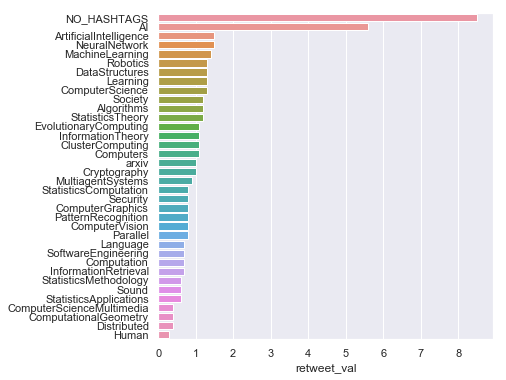

In [39]:
# visualization
test = test.sort_values(by=['retweet_val'], ascending=False)
sns.set(rc={'figure.figsize':(6,6)})
sns.barplot(x=test['retweet_val'], y=test.index)

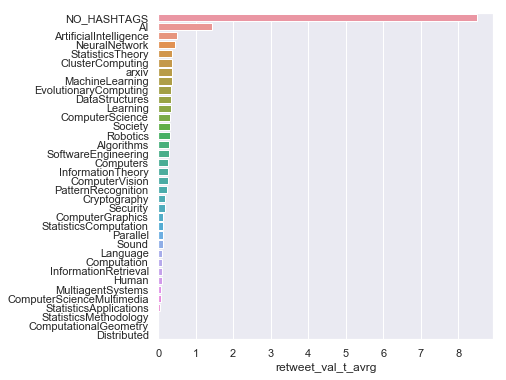

In [40]:
# visualization
test = test.sort_values(by=['retweet_val_t_avrg'], ascending=False)
sns.set(rc={'figure.figsize':(6,6)})
sns.barplot(x=test['retweet_val_t_avrg'], y=test.index)

,created_at,text,hashtags,retweet_count
0,Mon Jan 14 20:08:40 +0000 2019,#Learning #MachineLearning #Sound #ComputerScience https://t.co/Ezm9pT1nlk,Learning MachineLearning Sound ComputerScience,0
1,Mon Jan 14 18:08:47 +0000 2019,#PatternRecognition #ComputerVision https://t.co/yWDQwwvFbn,PatternRecognition ComputerVision,1
2,Mon Jan 14 16:08:42 +0000 2019,This one is a must read - the latest #ComputerScience #Learning #MachineLearning research by @arkrause https://t.co/x6yJlQMYP0,ComputerScience Learning MachineLearning,4


nr of examples: (159, 4)


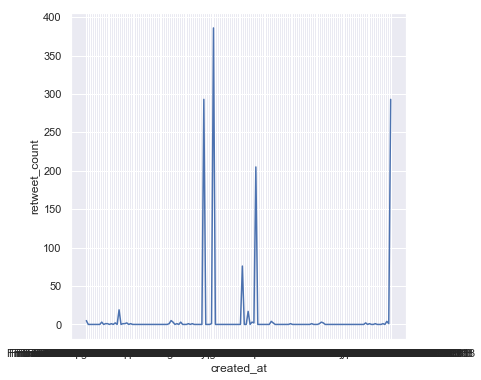

In [41]:
# SIDE CHECK EXPLORATORY ANALYSIS

# A little check.

# 'NO_HASHTAGS' looks turbo boosted, let's see why.
df = arXiv_tweets.loc[:,['created_at', 'text', 'hashtags', 'retweet_count']]
display(df.head(3))
nohash_df = df[df.hashtags == 'NO_HASHTAGS']
print('nr of examples: {}'.format(nohash_df.shape))

# So we got 159 tweets (~5%) with crazy amount of ~1300 retweets, outstanding number
# Lets check distribution over time
date = nohash_df.created_at
retweets = nohash_df.retweet_count
sns.lineplot(x=date,y=retweets)

In [42]:
# But tt comes out, a little of hashtags comes above the median, lets check it
rt_sum = nohash_df.retweet_count.sum()
print('all retweets with no hash:', rt_sum)
rt_med = rt_sum / len(nohash_df.retweet_count)
print('retweets per tweet', rt_med)

nohash_above = nohash_df[nohash_df.retweet_count > rt_med]
print('And only {} examples stands out of median'.format(nohash_above.shape[0]))

# A stunning number of 7 tweets, let's investigate them
nohash_above.sort_values(by=['retweet_count'], ascending=False)

# This are Retweets of @karpathy, @goodfellow_ian and @DeepMindAI,
# Well, I cant say rt number is a surprise ;) first is a top institute, and others
# are super known names in AI community, so no wonder RT gone skyrocket

# Decision: Therfore it's about time to exclude all no hashtags from df and run script again, 
# and also look closer if there are more retweets somewhere else. 

# Optionaly I could engeneer a feature for of RT known persons (or dummies of them) BUT
# it's a side quest with a little input for main, hashtag/category mining goal.

all retweets with no hash: 1352
retweets per tweet 8.50314465408805
And only 7 examples stands out of median


,created_at,text,hashtags,retweet_count
1565,Sun Aug 12 23:00:56 +0000 2018,"RT @karpathy: ""An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling"" https://t.co/N8xk2OHtd8 good…",NO_HASHTAGS,386
1211,Wed Sep 26 13:01:47 +0000 2018,"RT @DeepMindAI: Today we are open-sourcing our code for ""The mechanics of n-player differentiable games""!\r\n\r\nCode: https://t.co/FHJ9nZ8U8v\r\nOr…",NO_HASHTAGS,293
1916,Sat Jul 14 22:14:25 +0000 2018,"RT @goodfellow_ian: This new family of GAN loss functions looks promising! I'm especially excited about Fig 4-6, where we see that the new…",NO_HASHTAGS,293
1544,Thu Aug 16 07:13:28 +0000 2018,"RT @math3ma: Very happy to see Chelsea Walton's ""An Invitation to Noncommutative Algebra"" on the arXiv today! A brief tour of the subject a…",NO_HASHTAGS,205
1818,Sun Jul 22 21:09:22 +0000 2018,RT @fchollet: Very nice paper on Cartesian Genetic Programming applied to Atari games. https://t.co/f08gWRpP9S -- State-of-the-art on a num…,NO_HASHTAGS,76
498,Fri Nov 30 17:33:21 +0000 2018,RT @driainmurray: .@arturbekasov's short paper nicely illustrates how Bayesian inference is different from parameter regularization and boo…,NO_HASHTAGS,19
657,Sun Nov 18 01:34:01 +0000 2018,RT @buban_james: Spatial Pyramid Pooling is a clever technique to bypass the fixed input size requirement for CNNs that can be applied to m…,NO_HASHTAGS,17
